# Libraries

In [ ]:
import numpy as np
import pandas as pd
import os
from os import listdir
import time
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
sns.set_style('darkgrid')
import shutil
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.preprocessing import LabelBinarizer
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import scipy.stats as stats
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.linear_model import LogisticRegression


In [ ]:
EPOCHS = 10
INIT_LR = 1e-3
BS = 32
default_image_size = tuple((150, 150))
image_size = 0
directory_root = '/content/drive/MyDrive/Crop Disease/Image Data base'
width=150
height=150
depth=1

In [ ]:
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, default_image_size)   
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [ ]:
image_list, label_list,training_data,image_path = [], [],[],[]
try:
    print("[INFO] Loading images ...")
    root_dir = listdir(directory_root)
    dir = ''
    for plant_folder in root_dir :

        if plant_folder != 'Healthy':
          plant_disease_folder_list = listdir(f"{directory_root}/{plant_folder}")
          print(f"[INFO] Processing {plant_folder} ...")

          if len(plant_disease_folder_list) >= 200:
            for image in plant_disease_folder_list[:200]:

                image_directory = f'{directory_root}/{plant_folder}/{image}'
              
                if image_directory.endswith(".jpg") == True or image_directory.endswith(".JPG") == True:
                          image_list.append(convert_image_to_array(image_directory))
                          label_list.append(plant_folder)
                          image_path.append(image_directory)
        

    print("[INFO] Image loading completed")  
except Exception as e:
    print(f"Error : {e}")

[INFO] Loading images ...
[INFO] Processing algal leaf in tea ...
[INFO] Processing anthracnose in tea ...
[INFO] Processing Apple Apple scab ...
[INFO] Processing Apple Black rot ...
[INFO] Processing Apple Cedar apple rust ...
[INFO] Processing Bacterial leaf blight in rice leaf ...
[INFO] Processing bird eye spot in tea ...
[INFO] Processing Blight in corn Leaf ...
[INFO] Processing brown blight in tea ...
[INFO] Processing Brown spot in rice leaf ...
[INFO] Processing cabbage looper ...
[INFO] Processing Cercospora leaf spot ...
[INFO] Processing Cherry (including sour) Powdery mildew ...
[INFO] Processing Common Rust in corn Leaf ...
[INFO] Processing Grape Black rot ...
[INFO] Processing Gray Leaf Spot in corn Leaf ...
[INFO] Processing lemon canker ...
[INFO] Processing Nitrogen deficiency in plant ...
[INFO] Processing potassium deficiency in plant ...
[INFO] Processing Potato Early blight ...
[INFO] Processing Potato Late blight ...
[INFO] Processing Sogatella rice ...
[INFO] 

In [ ]:
plant_folder = 'Healthy'
plant_disease_folder_list = listdir(f"{directory_root}/{plant_folder}")

  
for h_folder in plant_disease_folder_list:

  h_dir = listdir(f'{directory_root}/{plant_folder}/{h_folder}')

  for image in h_dir[:25]:

    image_directory = f'{directory_root}/{plant_folder}/{h_folder}/{image}'
  
    if image_directory.endswith(".jpg") == True or image_directory.endswith(".JPG") == True:
              image_list.append(convert_image_to_array(image_directory))
              label_list.append(plant_folder)
              image_path.append(image_directory)

In [ ]:
X = image_list


In [ ]:
image_size = len(image_list)


In [ ]:
X= np.array(X).reshape(image_size,-1)


In [ ]:
image_list[0].shape

(150, 150, 3)

In [ ]:
X = X/255.0


In [ ]:
df = pd.DataFrame({'Labels':label_list})

In [ ]:
df['Category'] = pd.factorize(df['Labels'], sort=False)[0]

In [ ]:
y = df.Category

# Dimensionality Reduction

In [ ]:
Pca_Values = []
Acc_Score = []
Acc_Score_train = []

In [ ]:
ss = StandardScaler()
bees_stand = ss.fit_transform(X)

comp = 50
Pca_Values.append(comp)
pca = PCA(n_components=comp)
# use fit_transform to run PCA on our standardized matrix
pca.fit_transform(bees_stand)
reduced = pca.transform(bees_stand)


In [ ]:
X_n = pd.DataFrame(reduced)

In [ ]:
X_n

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,361.898621,-96.225449,1.258532,-20.087450,13.812411,7.096200,-31.077454,-12.790490,18.613291,67.702576,...,-9.759682,-2.290902,0.865054,-22.419895,10.697903,19.090322,-10.251316,12.806096,-6.545262,8.911745
1,362.000854,-16.272741,74.515800,16.668772,69.825836,-63.466812,-9.904073,3.637636,-59.672459,29.895653,...,-2.430047,0.891362,-5.545342,-1.522460,-9.073654,2.799300,7.050782,-6.697923,-6.052088,-14.717789
2,327.537903,-116.903603,-84.606804,-18.002205,-2.056221,-2.425444,-8.077702,18.201115,24.759933,31.579077,...,-6.130079,10.818809,-8.415296,-1.591815,0.737766,-1.896417,23.365059,7.379289,2.191005,14.166661
3,360.097168,-97.366478,1.031242,41.072411,18.438784,-9.097738,-31.512558,26.642277,35.088215,60.745888,...,-6.068509,-1.279856,11.255282,20.292440,1.038873,-27.375652,-1.845436,-4.455994,-4.506156,11.021475
4,328.765564,-142.397247,3.425206,-14.817533,2.028856,-5.541529,-13.021929,8.049588,-11.989328,34.388493,...,-13.323487,11.400872,-16.024807,-3.021682,0.120930,1.108254,23.615200,1.681379,-3.106287,7.820064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4195,41.586304,-106.671135,34.650017,9.979740,-38.545166,-3.614646,69.833740,26.568399,25.031916,0.900970,...,-8.297649,-9.688956,1.265578,-19.934721,2.590813,-2.722170,-10.478309,-2.079891,-1.726820,-1.873798
4196,30.992863,-133.566986,-25.096008,5.307425,-6.547452,-0.130974,54.530525,9.606862,-16.356020,-0.117504,...,1.261049,0.806408,-2.563964,0.132907,-6.411891,-11.539891,-8.164742,-10.516157,-26.003416,-12.531113
4197,43.523350,-40.112347,-22.288137,-42.864731,-54.771683,-35.398067,56.939663,60.762959,29.258423,33.953739,...,-15.428939,-8.617270,4.431273,-9.176916,0.712204,9.004234,2.358000,17.635818,4.017189,-3.244166
4198,-64.284134,-150.670563,-27.638447,33.740154,-23.510235,20.478100,17.447308,-34.498711,-27.300882,30.707130,...,-9.813411,-0.208898,19.213396,-0.261269,1.874925,-4.620174,11.796722,-4.250270,-11.170275,5.559074


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_n,y,test_size=0.15,random_state=77,stratify=y)

In [ ]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [ ]:
score = model.score(X_test,y_test)

In [ ]:
score_train = model.score(X_train,y_train)

In [ ]:
Acc_Score_train.append(score_train)
Acc_Score.append(score)
score_train,score

(0.6190476190476191, 0.5444444444444444)

In [ ]:
len(Pca_Values),len(Acc_Score_train)

(5, 5)

Text(0, 0.5, 'Accuracy')

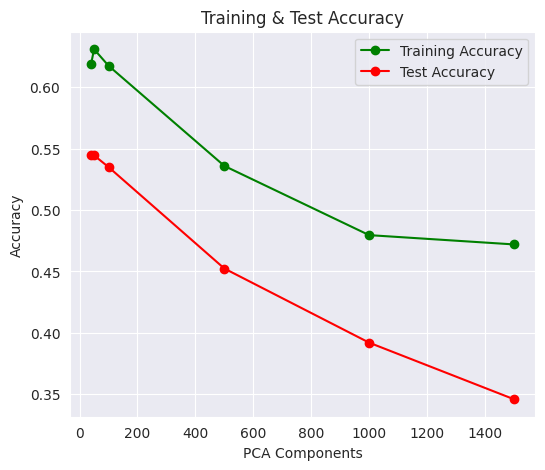

In [ ]:
plt.figure(figsize=(6,5))
plt.plot(Pca_Values , Acc_Score_train , 'go-' , label = 'Training Accuracy')
plt.plot(Pca_Values , Acc_Score , 'ro-' , label = 'Test Accuracy')
plt.title('Training & Test Accuracy')
plt.legend()
plt.xlabel("PCA Components")
plt.ylabel("Accuracy")


# SVM

In [ ]:
svc = SVC(C=10,kernel='rbf')
 
# Fit the model
svc.fit(X_train, y_train)

SVC(C=10)

In [ ]:
score = svc.score(X_test,y_test)

In [ ]:
score_t = svc.score(X_train,y_train)

In [ ]:
score_t,score

(0.9714285714285714, 0.6793650793650794)

In [ ]:
C_Values = [0.01,0.01,1.0,10,100]
Gamma = [0.1,0.001,0.0001,0,10]

train_score = []
test_score = []

for C,gamma in zip(C_Values,Gamma):

  svc = SVC(C=C,gamma=gamma)
  svc.fit(X_train,y_train)

  trainScore = svc.score(X_train,y_train)
  testScore = svc.score(X_test,y_test)

  train_score.append(trainScore)
  test_score.append(testScore)

Text(0, 0.5, 'Accuracy')

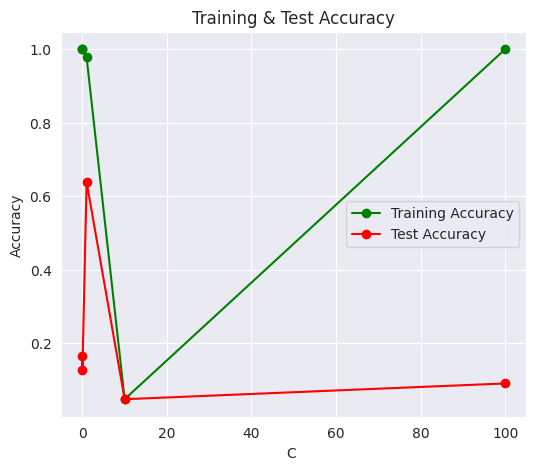

In [ ]:
plt.figure(figsize=(6,5))
plt.plot(C_Values , train_score , 'go-' , label = 'Training Accuracy')
plt.plot(C_Values , test_score , 'ro-' , label = 'Test Accuracy')

# plt.plot(Gamma , train_score , 'go-' , label = 'Training Accuracy')
# plt.plot(Gamma , test_score , 'ro-' , label = 'Test Accuracy')

plt.title('Training & Test Accuracy')
plt.legend()
plt.xlabel("C ")
plt.ylabel("Accuracy")

In [ ]:
df = pd.DataFrame({'C':C_Values,'Gamma':Gamma,'Train Accuracy':train_score,'Test Accuracy':test_score})

In [ ]:
df

,C,Gamma,Train Accuracy,Test Accuracy
0,0.01,0.1000,0.999440,0.165079
1,0.01,0.0010,0.999440,0.126984
2,1.00,0.0001,0.977311,0.638095
3,10.00,0.0000,0.047619,0.047619
4,100.00,10.0000,0.999440,0.090476


In [ ]:
perm_importance = permutation_importance(svc, X_test, y_test)


In [ ]:
perm_importance

{'importances_mean': array([0.04285714, 0.04285714, 0.04253968, 0.04190476, 0.04190476,
        0.04222222, 0.04190476, 0.0415873 , 0.04222222, 0.04253968,
        0.04222222, 0.04285714, 0.04222222, 0.04190476, 0.04222222,
        0.04222222, 0.04222222, 0.04126984, 0.04222222, 0.04095238,
        0.04222222, 0.04190476, 0.04190476, 0.04190476, 0.04285714,
        0.04190476, 0.04253968, 0.0415873 , 0.04222222, 0.04253968,
        0.04126984, 0.04063492, 0.0415873 , 0.04095238, 0.0415873 ,
        0.04253968, 0.0415873 , 0.04190476, 0.04      , 0.04253968,
        0.04190476, 0.04126984, 0.0415873 , 0.04063492, 0.04031746,
        0.0415873 , 0.04126984, 0.04126984, 0.04126984, 0.04095238]),
 'importances_std': array([0.        , 0.        , 0.00063492, 0.00190476, 0.00126984,
        0.00077762, 0.00126984, 0.00118783, 0.00077762, 0.00063492,
        0.00126984, 0.        , 0.00126984, 0.00126984, 0.00077762,
        0.00077762, 0.00126984, 0.0010039 , 0.00077762, 0.0018511 ,
       

# Random Forest

In [ ]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f98a4a22b00>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f98a4a21a80>})

In [ ]:
score = rand_search.score(X_test,y_test)

In [ ]:
score_t = rand_search.score(X_train,y_train)

In [ ]:
score_t,score

(0.9980392156862745, 0.6238095238095238)

# Logistic Regression

In [ ]:
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=16)

In [ ]:
score = logreg.score(X_test,y_test)

In [ ]:
score_t = logreg.score(X_train,y_train)

In [ ]:
score_t,score

(0.6291316526610644, 0.5492063492063493)